<h1>Machine Learning Final</h1>

In [64]:
# Machine Learning Final
# Connor Hehn and John Minogue

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

<h2>Importing The Data</h2>

In [65]:
# Reading the data into data frames

df_1E = pd.read_csv("Data/Subject01E.csv")
df_1G = pd.read_csv("Data/Subject01G.csv")

df_2E = pd.read_csv("Data/Subject02E.csv")
df_2G = pd.read_csv("Data/Subject02G.csv")

df_3E = pd.read_csv("Data/Subject03E.csv")
df_3G = pd.read_csv("Data/Subject03G.csv")

df_4E = pd.read_csv("Data/Subject04E.csv")
df_4G = pd.read_csv("Data/Subject04G.csv")

df_5E = pd.read_csv("Data/Subject05E.csv")
df_5G = pd.read_csv("Data/Subject05G.csv")

df_6E = pd.read_csv("Data/Subject06E.csv")
df_6G = pd.read_csv("Data/Subject06G.csv")

df_7E = pd.read_csv("Data/Subject07E.csv")
df_7G = pd.read_csv("Data/Subject07G.csv")

df_8E = pd.read_csv("Data/Subject08E.csv")
df_8G = pd.read_csv("Data/Subject08G.csv")

df_9E = pd.read_csv("Data/Subject09E.csv")
df_9G = pd.read_csv("Data/Subject09G.csv")

df_10E = pd.read_csv("Data/Subject10E.csv")
df_10G = pd.read_csv("Data/Subject10G.csv")

<h2>Data Preprocessing and Cleaning<h2>

In [66]:
# Merging all the dataframes into one dataframe
frame = [df_1E, df_1G, df_2E, df_2G, df_3E, df_3G, df_4E, df_4G, df_5E, df_5G, df_6E, df_6G, df_7E, df_7G, df_8E, df_8G, df_9E, df_9G, df_10E, df_10G]
main_dataframe = pd.concat(frame)

main_dataframe.fillna(method='ffill',inplace=True)
main_dataframe.fillna(0)
main_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10542 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Grounded           10542 non-null  float64
 1   Time[secs]         10542 non-null  float64
 2   Forefoot Force[N]  10542 non-null  float64
 3   Midfoot Force[N]   10542 non-null  float64
 4   Heel Force[N]      10542 non-null  float64
 5   TForce[N]          10542 non-null  float64
 6   RAnkleFlexion      10542 non-null  float64
 7   RAnkleInversion    10542 non-null  float64
 8   RAnkleAbduction    10542 non-null  float64
 9   Person             10542 non-null  float64
dtypes: float64(10)
memory usage: 906.0 KB


<h2>Feature Engineering</h2>

In [67]:
# --------------------------------------------------
# Creating a new dataframe with the average values
main_mean = main_dataframe.groupby(['Person','Grounded'],as_index=False)[main_dataframe.columns].mean()
main_mean = main_mean.add_suffix(" Avg")

for i in range(len(main_mean)):
    main_mean['Person'] = main_mean['Person Avg']
    main_mean['Grounded'] = main_mean['Grounded Avg']

# Dropping unecessary columns
main_mean = main_mean.drop(columns = 'Person Avg')
main_mean = main_mean.drop(columns = 'Grounded Avg')
main_mean = main_mean.drop(columns = 'Time[secs] Avg')


# --------------------------------------------------
# Creating a new dataframe with the min values
main_min = main_dataframe.groupby(['Person','Grounded'],as_index=False)[main_dataframe.columns].min()
main_min = main_min.add_suffix(" Min")

for i in range(len(main_min)):
    main_min['Person'] = main_min['Person Min']
    main_min['Grounded'] = main_min['Grounded Min']

# Dropping uncessary columns
main_min = main_min.drop(columns = 'Person Min')
main_min = main_min.drop(columns = 'Grounded Min')
main_min = main_min.drop(columns = 'Time[secs] Min')


# --------------------------------------------------
# Creating a new dataframe with the max values
main_max = main_dataframe.groupby(['Person','Grounded'],as_index=False)[main_dataframe.columns].max()
main_max = main_max.add_suffix(" Max")

for i in range(len(main_max)):
    main_max['Person'] = main_max['Person Max']
    main_max['Grounded'] = main_max['Grounded Max']

# Dropping uncessary columns
main_max = main_max.drop(columns = 'Person Max')
main_max = main_max.drop(columns = 'Grounded Max')
main_max = main_max.drop(columns = 'Time[secs] Max')


# --------------------------------------------------
# Creating a new dataframe with the std values
main_std = main_dataframe.groupby(['Person','Grounded'],as_index=False)[main_dataframe.columns].std()
main_std = main_std.add_suffix(" Std")

# Dropping uncessary columns
main_std = main_std.drop(columns = 'Person Std')
main_std = main_std.drop(columns = 'Grounded Std')
main_std = main_std.drop(columns = 'Time[secs] Std')


In [68]:
# Initializing the main datafram with the mean data
df = main_mean

# Adding the max values to the main dataframe
for col in main_max.columns:
    df[col] = main_max[col]

# Adding the min values to the main dataframe
for col in main_min.columns:
    df[col] = main_min[col]

# Adding the std values to the main dataframe
for col in main_std.columns:
    df[col] = main_std[col]

# Showing that all the columns are there

<h2>Feature Selection</h2>

<AxesSubplot: >

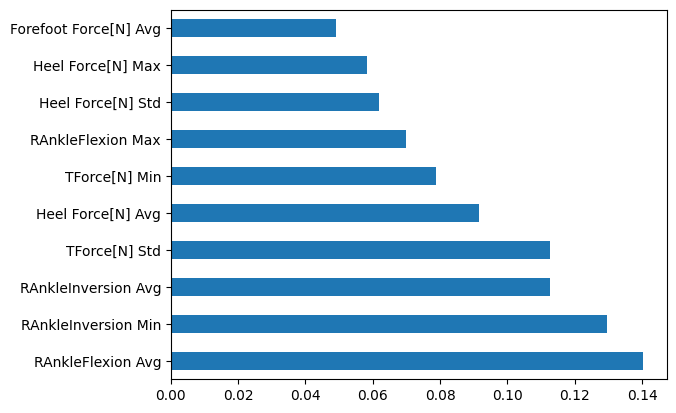

In [69]:
y = df.Grounded
X = df.drop(columns='Grounded')
X = X.drop(columns='Person')

model = RandomForestClassifier()
model.fit(X, y)

(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 

In [70]:
# Saving the index of the subject number (person). Then dropping it from the main datafram
persons = df['Person']
df = df.drop(columns='Person')

y = df.Grounded
df = df.drop(columns='Grounded')

# Performing SelectKBest on the data to get the 2 most influential data
scaler = SelectKBest(f_classif,k=5)
scaler.fit_transform(df, y)

# Select K Best drops the column names - need to get them back
cols = scaler.get_support(indices = True)
resulting_df = df.iloc[:,cols]

print(f"The most influential columns on the target are: {resulting_df.columns.values}")


# Now that I have the new DataFrame the targets and person index need to be added back
resulting_df['Grounded'] = y
resulting_df['Person'] = persons

df = resulting_df
df = df[["Grounded","Person","RAnkleFlexion Max","RAnkleInversion Min"]]

The most influential columns on the target are: ['Heel Force[N] Avg' 'RAnkleFlexion Avg' 'RAnkleInversion Avg'
 'RAnkleFlexion Max' 'RAnkleInversion Min']


/home/codespace/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [15 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/tmp/ipykernel_5102/2797429656.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resulting_df['Grounded'] = y
/tmp/ipykernel_5102/2797429656.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

<h2>Logistic Regression Model</h2>

In [71]:
# Logistic Regression Model

total_score = 0
for i in range(10):
    # Creating the test dataset
    test = df.loc[df['Person']==(i+1)]
    # Creating y_test
    y_test = test.Grounded
    # Creating x_test and dropping target and index
    x_test = test.drop(columns='Grounded')
    x_test = x_test.drop(columns='Person')


    # Creating the train dataset
    train = df.loc[df['Person']!=(i+1)]
    # Creating y_train
    y_train = train.Grounded
    # Creting x_train and dropping target and index
    x_train = train.drop(columns='Grounded')
    x_train = x_train.drop(columns='Person')


    clf = LogisticRegression()

    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)

    score = clf.score(x_test,y_test)
    total_score += score
    conf = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(conf,index = [0,1],columns=[0,1])

    # Confusion Matrix
    # cm = confusion_matrix(y_test, pred)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()

    # Accuracy 
    print('\nAccuracy Score: ' , accuracy_score(y_test,pred)*100 , '%\n' )

    # F-1 Score
    print('F1 Score: ' , f1_score(y_test, pred, average='macro'))


total_score = total_score/10
print(total_score)


Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0

Accuracy Score:  100.0 %

F1 Score:  1.0
1.0


<h2>Random Forest Classifier</h2>

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


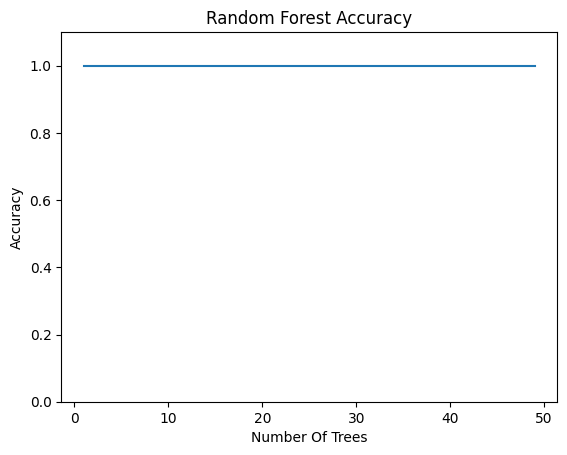

In [72]:
# Random Forest

total_score = 0
number_trees = list(range(1,50))
trees_score = []

for x in number_trees:
    total_score = 0
    for i in range(10):
        # Creating the test dataset
        test = df.loc[df['Person']==(i+1)]
        # Creating y_test
        y_test = test.Grounded
        # Creating x_test and dropping target and index
        x_test = test.drop(columns='Grounded')
        x_test = x_test.drop(columns='Person')


        # Creating the train dataset
        train = df.loc[df['Person']!=(i+1)]
        # Creating y_train
        y_train = train.Grounded
        # Creting x_train and dropping target and index
        x_train = train.drop(columns='Grounded')
        x_train = x_train.drop(columns='Person')

        # Random state = 1 for initial 
        clf = RandomForestClassifier(n_estimators=x,random_state=2)

        clf.fit(x_train,y_train)
        pred = clf.predict(x_test)

        score = clf.score(x_test,y_test)
        total_score += score
        conf = confusion_matrix(y_test, pred)
        df_cm = pd.DataFrame(conf,index = [0,1],columns=[0,1])

    total_score = total_score/10
    trees_score.append(total_score)
    

plt.plot(number_trees,trees_score)
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy")
plt.ylim([0,1.1])
plt.title("Random Forest Accuracy")
plt.show()